## CHAINLINK PRELIMINARY ANALYSIS

### Import Libraries:

In [1]:
# Relevant libraries will be imported here:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy.stats import norm

### Import Excel Data: 
##### *Cryptocurrency data was extracted from coingecko api and formatted in excel to serve the purpose of this analysis. S&P 500 data was extracted from yahoo finance api and formatted in excel to serve the purpose of this analysis. The first data set includes S&P 500 price and returns data, alongside the top 10 cryptocurrencies (excluding Tether USD), and is adjusted to the S&P 500 dates. The second data set includes the price and returns for the top 10 cryptocurrencies (exclusing Tether USD) from the coingecko api.    

In [2]:
# Import excel documents

# First data set: Adjusted to S&P 500 dates
mkt_price = pd.read_excel("market_price.xlsx")
mkt_returns = pd.read_excel("mkt_returns.xlsx")

# Second data set: Availalbe data from Coingecko for the top 10 cryptocurrencies 
price_data = pd.read_excel("price_data.xlsx")
returns_data = pd.read_excel("returns.xlsx")

### Format Data: 

##### *The returns data for both the first and second data set have been segmented into 2 timeframes: 2017-11-09 and 2020-03-12 to 2021-03-12.

In [3]:
# Date variables
period1_start = '2017-11-09'
period1_end = '2021-03-12'

period2_start = '2020-03-12'
period2_end = '2021-03-12'

# Create a new dataframe with data from 2020-03-12 to 2021-03-12 for the mkt_returns data set
mkt_returns_1yr = pd.DataFrame()

mkt_returns_1yr["Date"] = mkt_returns['Date'].loc[(mkt_returns['Date'] > period2_start) & (mkt_returns['Date'] <= period2_end)]
mkt_returns_1yr["^GSPC"] = mkt_returns['^GSPC'].loc[(mkt_returns['Date'] > period2_start) & (mkt_returns['Date'] <= period2_end)]
mkt_returns_1yr['btc'] = mkt_returns['btc '].loc[(mkt_returns['Date'] > period2_start) & (mkt_returns['Date'] <= period2_end)]
mkt_returns_1yr["eth"] = mkt_returns['eth '].loc[(mkt_returns['Date'] > period2_start) & (mkt_returns['Date'] <= period2_end)]
mkt_returns_1yr["bnb"] = mkt_returns['bnb'].loc[(mkt_returns['Date'] > period2_start) & (mkt_returns['Date'] <= period2_end)]
mkt_returns_1yr["dot"] = mkt_returns['dot '].loc[(mkt_returns['Date'] > period2_start) & (mkt_returns['Date'] <= period2_end)]
mkt_returns_1yr["ada"] = mkt_returns['ada '].loc[(mkt_returns['Date'] > period2_start) & (mkt_returns['Date'] <= period2_end)]
mkt_returns_1yr["xrp"] = mkt_returns['xrp'].loc[(mkt_returns['Date'] > period2_start) & (mkt_returns['Date'] <= period2_end)]
mkt_returns_1yr["uni"] = mkt_returns['uni'].loc[(mkt_returns['Date'] > period2_start) & (mkt_returns['Date'] <= period2_end)]
mkt_returns_1yr["ltc"] = mkt_returns['ltc'].loc[(mkt_returns['Date'] > period2_start) & (mkt_returns['Date'] <= period2_end)]
mkt_returns_1yr["link"] = mkt_returns['link'].loc[(mkt_returns['Date'] > period2_start) & (mkt_returns['Date'] <= period2_end)]

# Create a new dataframe with data from 2017-11-09 to 2021-03-12 for the mkt_returns data set
mkt_returns_3yr = pd.DataFrame()

mkt_returns_3yr["Date"] = mkt_returns['Date'].loc[(mkt_returns['Date'] > period1_start) & (mkt_returns['Date'] <= period1_end)]
mkt_returns_3yr["^GSPC"] = mkt_returns['^GSPC'].loc[(mkt_returns['Date'] > period1_start) & (mkt_returns['Date'] <= period1_end)]
mkt_returns_3yr['btc'] = mkt_returns['btc '].loc[(mkt_returns['Date'] > period1_start) & (mkt_returns['Date'] <= period1_end)]
mkt_returns_3yr["eth"] = mkt_returns['eth '].loc[(mkt_returns['Date'] > period1_start) & (mkt_returns['Date'] <= period1_end)]
mkt_returns_3yr["bnb"] = mkt_returns['bnb'].loc[(mkt_returns['Date'] > period1_start) & (mkt_returns['Date'] <= period1_end)]
mkt_returns_3yr["dot"] = mkt_returns['dot '].loc[(mkt_returns['Date'] > period1_start) & (mkt_returns['Date'] <= period1_end)]
mkt_returns_3yr["ada"] = mkt_returns['ada '].loc[(mkt_returns['Date'] > period1_start) & (mkt_returns['Date'] <= period1_end)]
mkt_returns_3yr["xrp"] = mkt_returns['xrp'].loc[(mkt_returns['Date'] > period1_start) & (mkt_returns['Date'] <= period1_end)]
mkt_returns_3yr["uni"] = mkt_returns['uni'].loc[(mkt_returns['Date'] > period1_start) & (mkt_returns['Date'] <= period1_end)]
mkt_returns_3yr["ltc"] = mkt_returns['ltc'].loc[(mkt_returns['Date'] > period1_start) & (mkt_returns['Date'] <= period1_end)]
mkt_returns_3yr["link"] = mkt_returns['link'].loc[(mkt_returns['Date'] > period1_start) & (mkt_returns['Date'] <= period1_end)]

# Create a new dataframe with data from 2020-03-12 to 2021-03-12 for the returns data set
returns_data_1yr = pd.DataFrame()

returns_data_1yr["date"] = returns_data['date'].loc[(returns_data['date'] > period2_start) & (returns_data['date'] <= period2_end)]
returns_data_1yr['btc'] = returns_data['btc price'].loc[(returns_data['date'] > period2_start) & (returns_data['date'] <= period2_end)]
returns_data_1yr["eth"] = returns_data['eth price'].loc[(returns_data['date'] > period2_start) & (returns_data['date'] <= period2_end)]
returns_data_1yr["bnb"] = returns_data['bnb price '].loc[(returns_data['date'] > period2_start) & (returns_data['date'] <= period2_end)]
returns_data_1yr["dot"] = returns_data['dot price'].loc[(returns_data['date'] > period2_start) & (returns_data['date'] <= period2_end)]
returns_data_1yr["ada"] = returns_data['ada price'].loc[(returns_data['date'] > period2_start) & (returns_data['date'] <= period2_end)]
returns_data_1yr["xrp"] = returns_data['xrp price'].loc[(returns_data['date'] > period2_start) & (returns_data['date'] <= period2_end)]
returns_data_1yr["uni"] = returns_data['uni price'].loc[(returns_data['date'] > period2_start) & (returns_data['date'] <= period2_end)]
returns_data_1yr["ltc"] = returns_data['ltc price'].loc[(returns_data['date'] > period2_start) & (returns_data['date'] <= period2_end)]
returns_data_1yr["link"] = returns_data['link price'].loc[(returns_data['date'] > period2_start) & (returns_data['date'] <= period2_end)]

# Create a new dataframe with data from 2017-11-09 to 2021-03-12 for the returns data set
returns_data_3yr = pd.DataFrame()

returns_data_3yr["date"] = returns_data['date'].loc[(returns_data['date'] > period1_start) & (returns_data['date'] <= period1_end)]
returns_data_3yr['btc'] = returns_data['btc price'].loc[(returns_data['date'] > period1_start) & (returns_data['date'] <= period1_end)]
returns_data_3yr["eth"] = returns_data['eth price'].loc[(returns_data['date'] > period1_start) & (returns_data['date'] <= period1_end)]
returns_data_3yr["bnb"] = returns_data['bnb price '].loc[(returns_data['date'] > period1_start) & (returns_data['date'] <= period1_end)]
returns_data_3yr["dot"] = returns_data['dot price'].loc[(returns_data['date'] > period1_start) & (returns_data['date'] <= period1_end)]
returns_data_3yr["ada"] = returns_data['ada price'].loc[(returns_data['date'] > period1_start) & (returns_data['date'] <= period1_end)]
returns_data_3yr["xrp"] = returns_data['xrp price'].loc[(returns_data['date'] > period1_start) & (returns_data['date'] <= period1_end)]
returns_data_3yr["uni"] = returns_data['uni price'].loc[(returns_data['date'] > period1_start) & (returns_data['date'] <= period1_end)]
returns_data_3yr["ltc"] = returns_data['ltc price'].loc[(returns_data['date'] > period1_start) & (returns_data['date'] <= period1_end)]
returns_data_3yr["link"] = returns_data['link price'].loc[(returns_data['date'] > period1_start) & (returns_data['date'] <= period1_end)]

### Visualizing Returns and Correlation:
##### *The following section will visualize the returns between the S&P 500 and Chainlink for the 2 periods being examined.

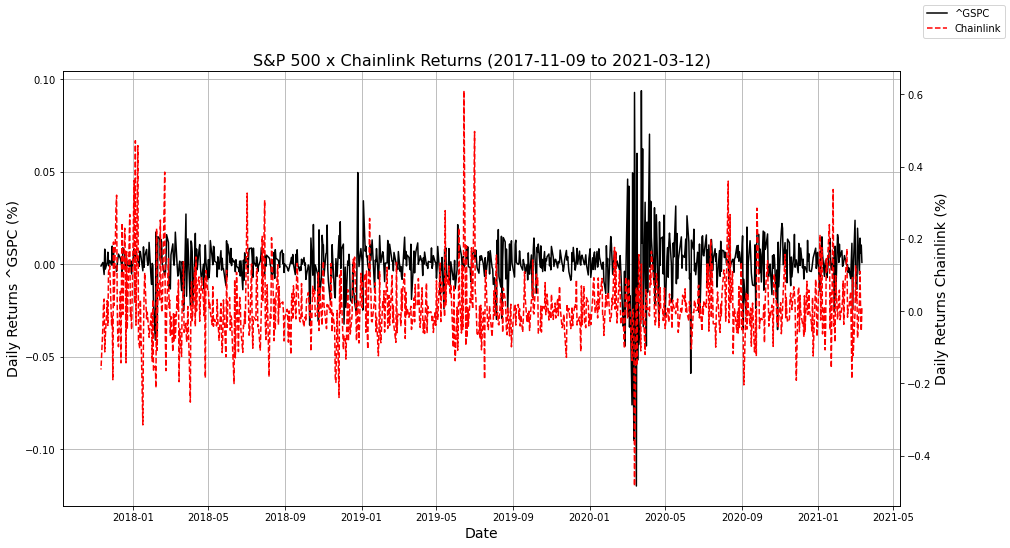

In [9]:
# Plot the returns of the S&P500 and Chainlink on the same plot for the period 2017-11-09 to 2021-03-12
fig, ax = plt.subplots(figsize=(15,8))

ax.plot(mkt_returns_3yr["Date"], mkt_returns_3yr["^GSPC"], color= "k", label= "^GSPC")
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("Daily Returns ^GSPC (%)", fontsize=14)


ax2=ax.twinx()
ax2.plot(mkt_returns_3yr["Date"], mkt_returns_3yr["link"], color="r", linestyle= "--" ,label= "Chainlink")
ax2.set_ylabel("Daily Returns Chainlink (%)", fontsize=14)

plt.title("S&P 500 x Chainlink Returns (2017-11-09 to 2021-03-12)", fontsize=16)
fig.legend(loc="upper right")
ax.grid()
            
plt.show()

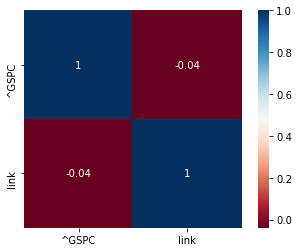

In [6]:
# Slice the data to create a heatmap with only the returns for the S&P 500 and Chainlink
mkt_returns_3yr_corr_data = pd.DataFrame()

mkt_returns_3yr_corr_data["Date"] = mkt_returns_3yr['Date']
mkt_returns_3yr_corr_data["^GSPC"] = mkt_returns_3yr['^GSPC']
mkt_returns_3yr_corr_data["link"] = mkt_returns_3yr['link']

# Plot a heatmap to visualize the correlation of asset returns for the period 2017-11-09 to 2021-03-12
corr_period1_sliced = mkt_returns_3yr_corr_data.corr()
heatmap_period1_sliced_3yr = sns.heatmap(corr_period1_sliced, 
                                         xticklabels=corr_period1_sliced.columns, 
                                         yticklabels=corr_period1_sliced.columns, 
                                         cmap='RdBu',
                                         annot=True,
                                         square=True)

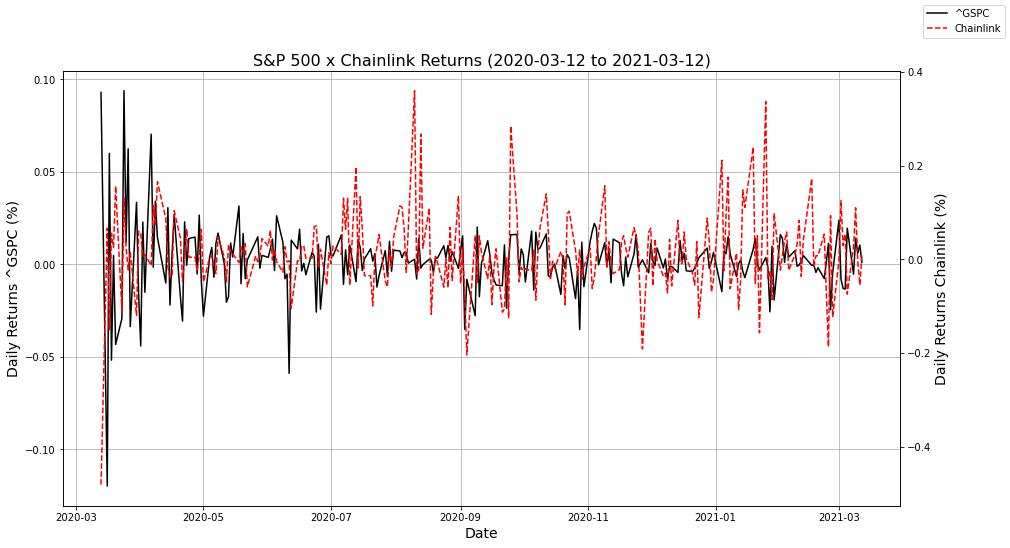

In [11]:
# Plot the returns of the S&P500 and Chainlink on the same plot for the period 2020-03-12 to 2021-03-12
fig, ax = plt.subplots(figsize=(15,8))

ax.plot(mkt_returns_1yr["Date"], mkt_returns_1yr["^GSPC"], color= "k", label= "^GSPC")
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("Daily Returns ^GSPC (%)", fontsize=14)

ax2=ax.twinx()
ax2.plot(mkt_returns_1yr["Date"], mkt_returns_1yr["link"], color="r", linestyle= "--" ,label= "Chainlink")
ax2.set_ylabel("Daily Returns Chainlink (%)", fontsize=14)

plt.title("S&P 500 x Chainlink Returns (2020-03-12 to 2021-03-12)", fontsize=16)
fig.legend(loc="upper right")
ax.grid()
            
plt.show()

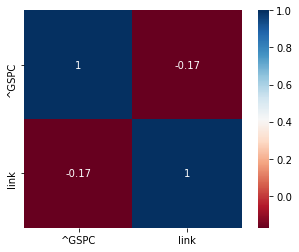

In [12]:
# Slice the data to create a heatmap with only the returns for the S&P 500 and Chainlink
mkt_returns_1yr_corr_data = pd.DataFrame()

mkt_returns_1yr_corr_data["Date"] = mkt_returns_1yr['Date']
mkt_returns_1yr_corr_data["^GSPC"] = mkt_returns_1yr['^GSPC']
mkt_returns_1yr_corr_data["link"] = mkt_returns_1yr['link']

# Plot a heatmap to visualize the correlation of asset returns for the period 2020-03-12 to 2021-03-12
corr_period2_sliced = mkt_returns_1yr_corr_data.corr()
heatmap_period2_sliced_1yr = sns.heatmap(corr_period2_sliced, 
                                         xticklabels=corr_period2_sliced.columns, 
                                         yticklabels=corr_period2_sliced.columns, 
                                         cmap='RdBu',
                                         annot=True,
                                         square=True)

### Beta Computation:
##### The beta between the S&P 500 and Chainlink is computed in the following section. The beta is computed for two periods; since its inception on coingecko in 2017 and since March of 2020, when Bitcoin was at an all time low, after the onslaught of the pandemic. Both periods returned a beta that was negative, suggesting evidence for Chainlink holding hedging properties. However, further evidence should be gathered to support this analysis.

In [13]:
# FIRST DATA SET (2017-11-09 to 2021-03-12)
period1 = "2017-11-09 to 2021-03-12"

# Variables required to perform the beta computation:

# Covariance matrix 
cov_period1 = mkt_returns_3yr.cov() * 252

# Covariance between S&P 500 and Chainlink returns
cov_with_mkt_period1 = cov_period1.iloc[0,9]

# The market variance for S&P 500
mkt_var_period1 = mkt_returns_3yr["^GSPC"].var() * 252

# Beta computation for period 1 
chainlink_beta_period1 = cov_with_mkt_period1 / mkt_var_period1

# SECOND DATA SET (2020-03-12 to 2021-03-12) 
period2 = "2020-03-12 to 2021-03-12"

# Variables required to perform the beta computation:

# Covariance matrix
cov_period2 = mkt_returns_1yr.cov() * 252

# Covariance between S&P 500 and Chainlink returns
cov_with_mkt_period2 = cov_period2.iloc[0,9]

# The market variance for S&P 500
mkt_var_period2 = mkt_returns_1yr["^GSPC"].var() * 252

# Beta computation for period 2 
chainlink_beta_period2 = cov_with_mkt_period2 / mkt_var_period2

# Print statement:
print("="*124)
print("BETA COMPUTATION OUTPUT:")
print("-"*124)
    
if chainlink_beta_period1 < -1:
    print("The beta, {:.4}, for the period, {}, suggests chainlink to be negatively correlated to the market with great volatility.".format(chainlink_beta_period1, period1))
elif -1 < chainlink_beta_period1 < -0.5:
    print("The beta, {:.4}, for the period, {}, suggests chainlink to hold sufficient hedging characteristics against the S&P500.".format(chainlink_beta_period1, period1))
elif -0.5 <= chainlink_beta_period1 < -0.025:
    print("The beta, {:.4}, for the period, {}, suggests chainlink to hold potential hedging characteristics against the S&P500.".format(chainlink_beta_period1, period1))
elif -0.025 <= chainlink_beta_period1 <= 0.025:
    print("The beta, {:.4}, for the period, {}, suggests chainlink to possess limited, if any, systematic risk, holding limited, if any, correlation to the S&P500.".format(chainlink_beta_period1, period1))
elif 0.025 < chainlink_beta_period1 <= 0.5:
    print("The beta, {:.4}, for the period, {}, suggests chainlink to be less volatile than the S&P 500. Potential use case for a defensive play against volatile market movements.".format(chainlink_beta_period1, period1))
elif 0.5 < chainlink_beta_period1 <= 1:
    print("The beta, {:.4}, for the period, {}, suggests chainlink to be with the market.".format(chainlink_beta_period1, period1))
else:
    print("The beta, {:.4}, for the period, {}, suggests chainlink to be more volatile than the market. Appropriate risk management should be exercised.".format(chainlink_beta_period1, period1))

print() # space

if chainlink_beta_period2 < -1:
    print("The beta, {:.4}, for the period, {}, suggests chainlink to be negatively correlated to the market with great volatility.".format(chainlink_beta_period2, period2))
elif -1 < chainlink_beta_period2 < -0.5:
    print("The beta, {:.4}, for the period, {}, suggests chainlink to hold sufficient hedging characteristics against the S&P500.".format(chainlink_beta_period2, period2))
elif -0.5 <= chainlink_beta_period2 < -0.025:
    print("The beta, {:.4}, for the period, {}, suggests chainlink to hold potential hedging characteristics against the S&P500.".format(chainlink_beta_period2, period2))
elif -0.025 <= chainlink_beta_period2 <= 0.025:
    print("The beta, {:.4}, for the period, {}, suggests chainlink to possess limited, if any, systematic risk, holding limited, if any, correlation to the S&P500.".format(chainlink_beta_period2, period2))
elif 0.025 < chainlink_beta_period2 <= 0.5:
    print("The beta, {:.4}, for the period, {}, suggests chainlink to be less volatile than the S&P 500. Potential use case for a defensive play against volatile market movements.".format(chainlink_beta_period2, period2))
elif 0.5 < chainlink_beta_period2 <= 1:
    print("The beta, {:.4}, for the period, {}, suggests chainlink to be with the market.".format(chainlink_beta_period2, period2))
else:
    print("The beta, {:.4}, for the period, {}, suggests chainlink to be more volatile than the market. Appropriate risk management should be exercised.".format(chainlink_beta_period2, period2))

print("-"*124)

BETA COMPUTATION OUTPUT:
----------------------------------------------------------------------------------------------------------------------------
The beta, -0.254, for the period, 2017-11-09 to 2021-03-12, suggests chainlink to hold potential hedging characteristics against the S&P500.

The beta, -0.7661, for the period, 2020-03-12 to 2021-03-12, suggests chainlink to hold sufficient hedging characteristics against the S&P500.
----------------------------------------------------------------------------------------------------------------------------


### Correlation Matrix of Top 10 Cryptocurrencies:
##### *The following section presents the correlation matrix for the top 10 cryptocurrencies. The 3 year timeframe shows Chainlink's correlations with the other assets in the data set to be below 0.55. Chainlink's correlation with the other assets increase in the 1 year timeframe.

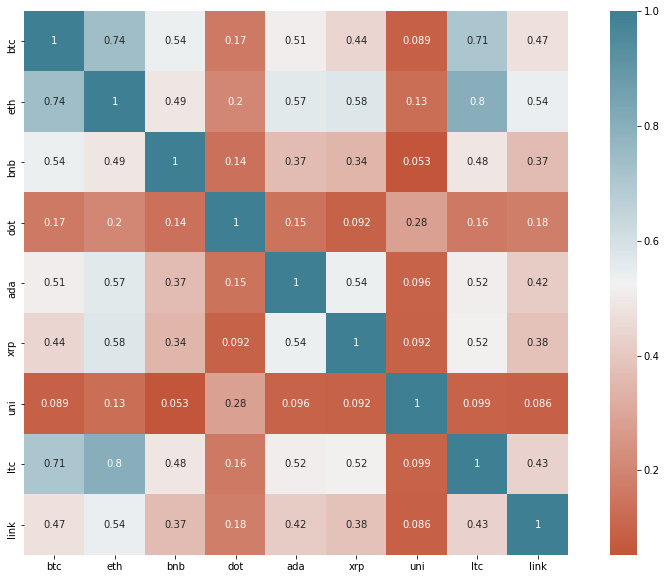

In [14]:
# Correlation matrix for the returns data with the top 10 cryptocurrencies for the period 2017-11-09 to 2021-03-12
corr_period1_top10 = returns_data_3yr.corr()

plt.subplots(figsize=(15,10))
heatmap_period1_top10_3yr = sns.heatmap(corr_period1_top10, 
                                         xticklabels=corr_period1_top10.columns, 
                                         yticklabels=corr_period1_top10.columns, 
                                         cmap=sns.diverging_palette(20, 220, n=200),
                                         annot=True,
                                         square=True)

plt.show()

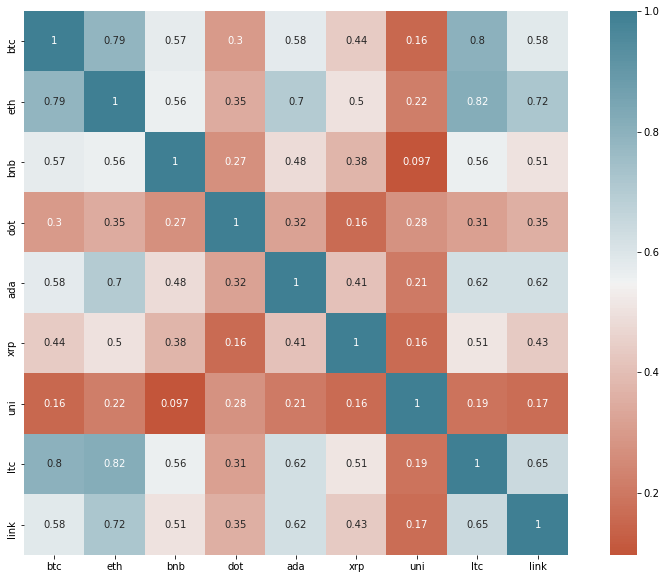

In [15]:
# Correlation matrix for the returns data with the top 10 cryptocurrencies for the period 2020-03-12 to 2021-03-12
corr_period2_top10 = returns_data_1yr.corr()

plt.subplots(figsize=(15,10))
heatmap_period1_top10_1yr = sns.heatmap(corr_period2_top10, 
                                        xticklabels=corr_period2_top10.columns, 
                                        yticklabels=corr_period2_top10.columns, 
                                        cmap=sns.diverging_palette(20, 220, n=200),
                                        annot=True,
                                        square=True)
plt.show()

### Forecasting Chainlink's Price - Monte Carlo Simulation:
##### *Forecasted for the year of 2021 using the two timeframes.

In [16]:
# FORMAT PRICE DATA TO THE APPROPRIATE TIMEFRAMES

# Create a new dataframe with data from 2017-11-09 to 2021-03-12 for the price data set (top 10)
price_data_3yr = pd.DataFrame()

price_data_3yr["date"] = price_data['date'].loc[(price_data['date'] > period1_start) & (price_data['date'] <= period1_end)]
price_data_3yr['btc'] = price_data['btc price'].loc[(price_data['date'] > period1_start) & (price_data['date'] <= period1_end)]
price_data_3yr["eth"] = price_data['eth price'].loc[(price_data['date'] > period1_start) & (price_data['date'] <= period1_end)]
price_data_3yr["bnb"] = price_data['bnb price '].loc[(price_data['date'] > period1_start) & (price_data['date'] <= period1_end)]
price_data_3yr["dot"] = price_data['dot price'].loc[(price_data['date'] > period1_start) & (price_data['date'] <= period1_end)]
price_data_3yr["ada"] = price_data['ada price'].loc[(price_data['date'] > period1_start) & (price_data['date'] <= period1_end)]
price_data_3yr["xrp"] = price_data['xrp price'].loc[(price_data['date'] > period1_start) & (price_data['date'] <= period1_end)]
price_data_3yr["uni"] = price_data['uni price'].loc[(price_data['date'] > period1_start) & (price_data['date'] <= period1_end)]
price_data_3yr["ltc"] = price_data['ltc price'].loc[(price_data['date'] > period1_start) & (price_data['date'] <= period1_end)]
price_data_3yr["link"] = price_data['link price'].loc[(price_data['date'] > period1_start) & (price_data['date'] <= period1_end)]

# Create a new dataframe with data from 2020-03-12 to 2021-03-12 for the price data set (top 10)
price_data_1yr = pd.DataFrame()

price_data_1yr["date"] = price_data['date'].loc[(price_data['date'] > period2_start) & (price_data['date'] <= period2_end)]
price_data_1yr['btc'] = price_data['btc price'].loc[(price_data['date'] > period2_start) & (price_data['date'] <= period2_end)]
price_data_1yr["eth"] = price_data['eth price'].loc[(price_data['date'] > period2_start) & (price_data['date'] <= period2_end)]
price_data_1yr["bnb"] = price_data['bnb price '].loc[(price_data['date'] > period2_start) & (price_data['date'] <= period2_end)]
price_data_1yr["dot"] = price_data['dot price'].loc[(price_data['date'] > period2_start) & (price_data['date'] <= period2_end)]
price_data_1yr["ada"] = price_data['ada price'].loc[(price_data['date'] > period2_start) & (price_data['date'] <= period2_end)]
price_data_1yr["xrp"] = price_data['xrp price'].loc[(price_data['date'] > period2_start) & (price_data['date'] <= period2_end)]
price_data_1yr["uni"] = price_data['uni price'].loc[(price_data['date'] > period2_start) & (price_data['date'] <= period2_end)]
price_data_1yr["ltc"] = price_data['ltc price'].loc[(price_data['date'] > period2_start) & (price_data['date'] <= period2_end)]
price_data_1yr["link"] = price_data['link price'].loc[(price_data['date'] > period2_start) & (price_data['date'] <= period2_end)]

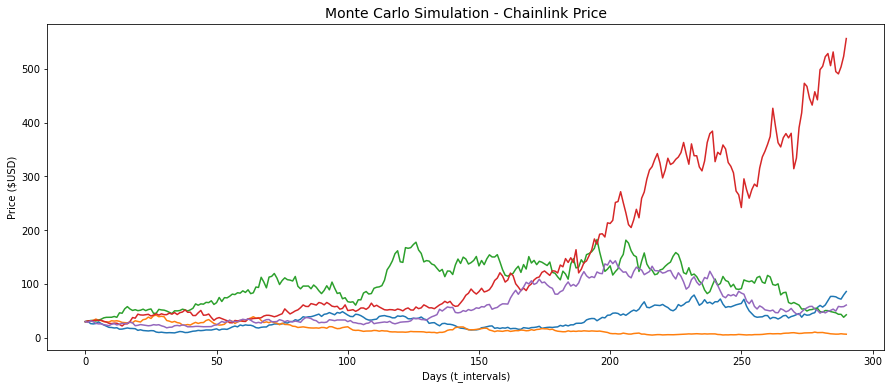

In [21]:
# MONTE CARLO SIMULATION FOR 3 YEAR DATA

# Compute the mean (u) and variance (var) of the daily returns

link_returns_3yr = np.log(price_data_3yr['link']/price_data_3yr['link'].shift(1)) *-1

link_u_3yr = link_returns_3yr.mean()
link_var_3yr = link_returns_3yr.var()

# Compute the drift component of Brownian Motion
drift_3yr = link_u_3yr - (0.5 * link_var_3yr)

# Compute standard deviations of the daily returns
link_stdev_3yr = link_returns_3yr.std()

# Convert drift and standard deviations into numpy arrays
np.array(drift_3yr)
np.array(link_stdev_3yr)

# Random variable for Brownian Motion
t_intervals = 291 # number of days forecasted price for
iterations = 5 # number of simulations

Z = norm.ppf(np.random.rand(t_intervals, iterations))

# Compute daily returns 
daily_returns_3yr = np.exp(drift_3yr + link_stdev_3yr * Z)

# Initialize today's price used to forecast future prices
S0 = price_data_3yr['link'].iloc[0]

# Create price list and indent today's price as the first data point in list
price_list_3yr = np.zeros_like(daily_returns_3yr)

price_list_3yr[0] = S0

# Monte Carlo Simulation
for t in range(1, t_intervals):
    price_list_3yr[t] = price_list_3yr[t-1]*daily_returns_3yr[t]
    
# Plot Monte Carlo Simulation
plt.figure(figsize=(15,6))
plt.plot(price_list_3yr)
plt.title("Monte Carlo Simulation - Chainlink Price", fontsize=14)
plt.xlabel("Days (t_intervals)")
plt.ylabel("Price ($USD)")

plt.show()

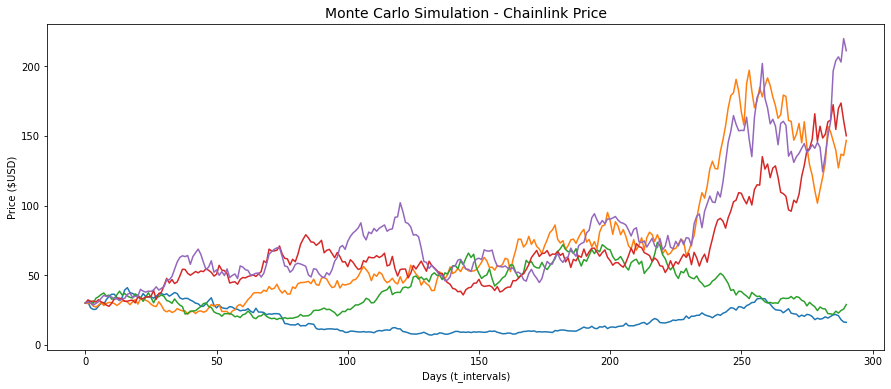

In [20]:
# MONTE CARLO SIMULATION FOR 1 YEAR DATA

# Compute the mean (u) and variance (var) of the daily returns

link_returns_1yr = np.log(price_data_1yr['link']/price_data_1yr['link'].shift(1)) *-1

link_u_1yr = link_returns_1yr.mean()
link_var_1yr = link_returns_1yr.var()

# Compute the drift component of Brownian Motion
drift_1yr = link_u_1yr - (0.5 * link_var_1yr)

# Compute standard deviations of the daily returns
link_stdev_1yr = link_returns_1yr.std()

# Convert drift and standard deviations into numpy arrays
np.array(drift_1yr)
np.array(link_stdev_1yr)

# Random variable for Brownian Motion
t_intervals = 291 # number of days forecasted price for
iterations = 5 # number of simulations

Z = norm.ppf(np.random.rand(t_intervals, iterations))

# Compute daily returns 
daily_returns_1yr = np.exp(drift_1yr + link_stdev_1yr * Z)

# Initialize today's price used to forecast future prices
S0 = price_data_1yr['link'].iloc[0]

# Create price list and indent today's price as the first data point in list
price_list_1yr = np.zeros_like(daily_returns_1yr)

price_list_1yr[0] = S0

# Monte Carlo Simulation
for t in range(1, t_intervals):
    price_list_1yr[t] = price_list_1yr[t-1]*daily_returns_1yr[t]
    
# Plot Monte Carlo Simulation
plt.figure(figsize=(15,6))
plt.plot(price_list_1yr)
plt.title("Monte Carlo Simulation - Chainlink Price", fontsize=14)
plt.xlabel("Days (t_intervals)")
plt.ylabel("Price ($USD)")

plt.show()